In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train_df = pd.read_csv("data/train.csv")

In [20]:
train_df.shape

(1460, 81)

In [21]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [22]:
train_df.columns[data.dtypes == "int64"]

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
train_df.columns[data.dtypes == "float64"]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [24]:
train_df.columns[data.dtypes == "object"]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

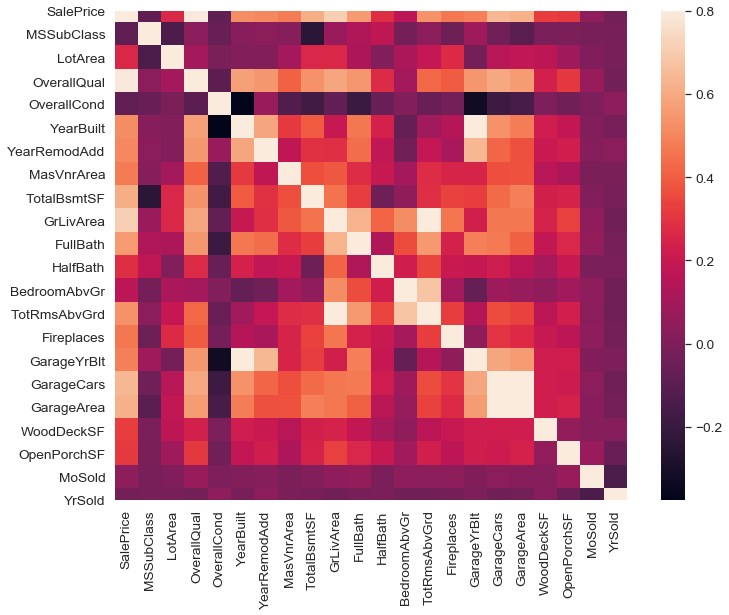

In [36]:
# Correlation map
corr_plot = temp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_plot, vmax=.8, square=True)

In [5]:
columns = ['SalePrice', 'MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'Foundation',
    'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']

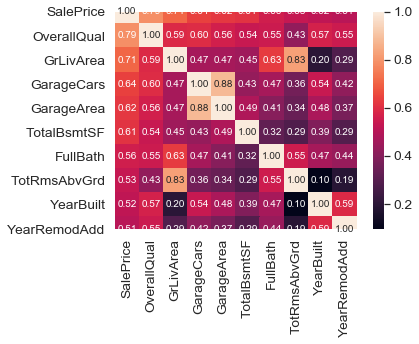

In [41]:
k = 10 #number of variables for heatmap
cols = corr_plot.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [20]:
columns1 = ['SalePrice', 'MSSubClass', 'LotArea', 
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 
    'TotalBsmtSF',  'GrLivArea', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']

In [21]:
train_df = train_df[columns1]

In [22]:
train_df.head()

SalePrice  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0     208500          60     8450            7            5       2003   
1     181500          20     9600            6            8       1976   
2     223500          60    11250            7            5       2001   
3     140000          70     9550            7            5       1915   
4     250000          60    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  GrLivArea  ...  BedroomAbvGr  \
0          2003       196.0          856       1710  ...             3   
1          1976         0.0         1262       1262  ...             3   
2          2002       162.0          920       1786  ...             3   
3          1970         0.0          756       1717  ...             3   
4          2000       350.0         1145       2198  ...             4   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   
2             6           1       2001.0           2         608           0   
3             7           1       1998.0           3         642           0   
4             9           1       2000.0           3         836         192   

   OpenPorchSF  MoSold  YrSold  
0           61       2    2008  
1            0       5    2007  
2           42       9    2008  
3           35       2    2006  
4           84      12    2008  

[5 rows x 22 columns]

In [23]:
target = train_df.SalePrice
features = train_df.drop('SalePrice', axis = 1)

In [24]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(random_state=42, n_estimators=100, max_features=2)
randomForest.fit(features, target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').